<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/notebooks/videos/Practica_1_2_Introduccion_a_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la Ciencia de Datos para Ingeniería Civil (TB042) - 2c2025

# Primeros pasos en Google Colab

# Títulos y subtítulos en celdas de texto
## Encabezado 1
### Encabezado 2
#### Encabezado 3
##### Encabezado 4

*cursiva*

_cursiva_

**negrita**


[Visita el Campus](https://campusgrado.fi.uba.ar/enrol/index.php?id=1245)

![Texto alternativo](https://cms.fi.uba.ar/uploads/DSCN_2332_30b7bb2707.JPG)

# Importar e instalar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# para lectura de archivos
from google.colab import files
import io


In [ ]:
!pip install gdown

In [ ]:
import gdown

# Lectura de archivos

## A partir de un link


In [ ]:
# ID del archivo en Google Drive (extraído de la URL)
file_id = '1AMfsNXvzqLNz0GtxGQ4ihmTkLtUCl2Li'
url = f'https://drive.google.com/uc?id={file_id}'
output = '/content/Sondeos.xlsx'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1AMfsNXvzqLNz0GtxGQ4ihmTkLtUCl2Li
To: /content/Sondeos.xlsx
100%|██████████| 55.3k/55.3k [00:00<00:00, 4.32MB/s]


'/content/Sondeos.xlsx'

In [ ]:
dfs = pd.read_excel(output, sheet_name=None)

In [ ]:
df = pd.read_excel('Sondeos.xlsx', sheet_name="SPT")

df = df.dropna(subset=['SONDEO'])
df.head()

,SONDEO,PROF [ft],Unnamed: 2,PROF [m],COTA,GOLPES 15,GOLPES 30,GOLPES 45,NSPT,DESCRIPCION IN SITU,...,N1(60),Dr (FHWA NHI 2001),Dr (Nuñez 2010),¿LIMPIO?,phi_cv,Q Bolton,psi,phi_max,phi_max FHWA,phi_max Nuñez
1,B-1,1.0,NaN,0.3048,-0.3048,NaN,NaN,NaN,22.0,NaN,...,28.050000,68.373972,65.105678,NO,30.0,8.0,9.194932,39.194932,38.256096,37.765852
2,B-1,3.5,NaN,1.0668,-1.0668,NaN,NaN,NaN,25.0,NaN,...,31.875000,72.886899,69.561896,NO,30.0,8.0,8.337331,38.337331,38.933035,38.434284
3,B-1,6.0,NaN,1.8288,-1.8288,NaN,NaN,NaN,45.0,NaN,...,57.375000,97.788036,89.535818,NO,30.0,8.0,9.585645,39.585645,42.668205,41.430373
4,B-1,8.5,NaN,2.5908,-2.5908,NaN,NaN,NaN,50.0,NaN,...,57.873265,98.211731,89.813358,NO,30.0,8.0,8.485312,38.485312,42.731760,41.472004
5,B-1,11.0,NaN,3.3528,-3.3528,NaN,NaN,NaN,37.0,NaN,...,36.929753,78.453545,74.693529,NO,30.0,8.0,5.887917,35.887917,39.768032,39.204029


In [ ]:
df_info = pd.read_excel('Sondeos.xlsx', sheet_name="Info")

df_info.head()

,Unnamed: 0,POSICIÓN,COORDENADA X,COORDENADA Y,COORDENADA Z,PROF NIVEL FREATICO,COTA NIVEL FREATICO
0,NaN,B-1,NaN,NaN,NaN,50,-50
1,NaN,B-2,NaN,NaN,NaN,50,-50
2,NaN,B-3,NaN,NaN,NaN,50,-50
3,NaN,B-4,NaN,NaN,NaN,50,-50
4,NaN,B-5,NaN,NaN,NaN,50,-50


### Actividades con el dataset

In [ ]:
df.columns

Index(['SONDEO', 'PROF [ft]', 'Unnamed: 2', 'PROF [m]', 'COTA', 'GOLPES 15',
       'GOLPES 30', 'GOLPES 45', 'NSPT', 'DESCRIPCION IN SITU', 'SUCS',
       'DESCRIPCION', 'PT4', 'PT10', 'PT40', 'PT200', 'w%', 'LL%', 'LP%',
       'IP%', 'gnat', 'gseca', 'NIVEL FREATICO', 'PROF NIVEL FREATICO', 'l',
       'sv', 'u', 's'v', 'CN Liao and Whitman (1986)', 'CN Meyerhof',
       'CN Terzaghi Peck', 'N1(60)', 'Dr (FHWA NHI 2001)', 'Dr (Nuñez 2010)',
       '¿LIMPIO?', 'phi_cv', 'Q Bolton', 'psi', 'phi_max', 'phi_max FHWA',
       'phi_max Nuñez'],
      dtype='object')

In [ ]:
df['SUCS'].unique()

array(['SM', 'GM', 'SP-SM', 'CL', 'SP ', 'SP', 'CH', 'SC', 'GP-GM'],
      dtype=object)

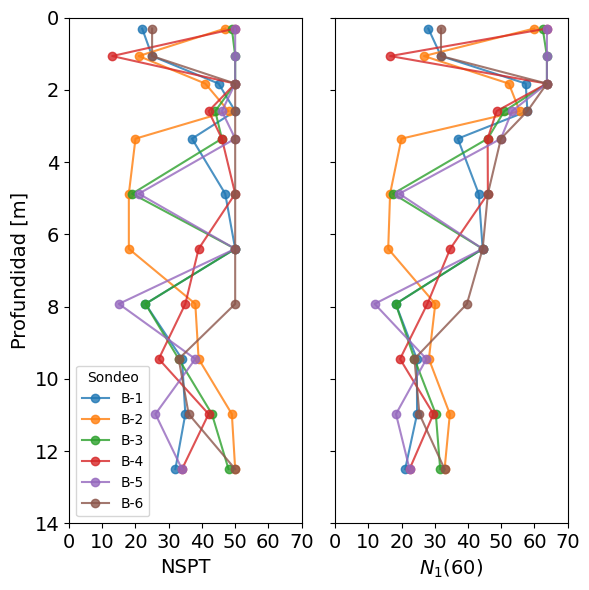

In [ ]:
figsize=16
labelsize=14
fig, axes = plt.subplots(1, 2, figsize=(6, 6), sharey=True)
df = df.rename(columns={'SONDEO': 'Sondeo', 'PROF [m]': 'Profundidad'})
df['NSPT'] = pd.to_numeric(df['NSPT'], errors='coerce')
df = df.dropna(subset=['NSPT'])
# Gráfico 1: NSPT
for sondeo, group in df.groupby('Sondeo'):
    axes[0].plot(group['NSPT'], group['Profundidad'], marker='o', linestyle='-', alpha=0.8, label=sondeo)

axes[0].set_ylim(0, 14)
axes[0].set_xlim(0, 70)
axes[0].set_xticks(np.arange(0, 71, 10))
axes[0].set_yticks(np.arange(0, 15, 2))
axes[0].set_xlabel('NSPT', fontsize=labelsize)
axes[0].set_ylabel('Profundidad [m]', fontsize=labelsize)
axes[0].tick_params(axis='x', labelsize=labelsize)
axes[0].tick_params(axis='y', labelsize=labelsize)
# axes[0].set_title('a) NSPT', loc='left', fontsize=12)
axes[0].legend(title='Sondeo', loc='lower left')
axes[0].invert_yaxis()

# Gráfico 2: N1(60)
for sondeo, group in df.groupby('Sondeo'):
    axes[1].plot(group['N1(60)'], group['Profundidad'], marker='o', linestyle='-', alpha=0.8, label=sondeo)


axes[1].set_ylim(0, 14)
axes[1].set_xlim(0, 70)
axes[1].set_xticks(np.arange(0, 71, 10))
axes[1].set_xlabel(r'$N_1(60)$', fontsize=labelsize)
# axes[1].set_title('b) N1(60)', loc='left', fontsize=12)
# Sin leyenda repetida
axes[1].tick_params(axis='x', labelsize=labelsize)
axes[1].tick_params(axis='y', labelsize=labelsize)
axes[1].legend().set_visible(False)
axes[1].invert_yaxis()
# Ajustar diseño
plt.tight_layout()
plt.show()


## Conectar con Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta_excel = '/content/drive/MyDrive/Colab Notebooks/Sondeos.xlsx'

# Paso 3: Leer el CSV con pandas
import pandas as pd
df = pd.read_excel(ruta_excel)

# Mostrar las primeras filas para verificar
print(df.head())

   Unnamed: 0 POSICIÓN  COORDENADA X  COORDENADA Y  COORDENADA Z  \
0         NaN      B-1           NaN           NaN           NaN   
1         NaN      B-2           NaN           NaN           NaN   
2         NaN      B-3           NaN           NaN           NaN   
3         NaN      B-4           NaN           NaN           NaN   
4         NaN      B-5           NaN           NaN           NaN   

   PROF NIVEL FREATICO  COTA NIVEL FREATICO  
0                   50                  -50  
1                   50                  -50  
2                   50                  -50  
3                   50                  -50  
4                   50                  -50  


## Subir archivos desde la PC

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Sondeos.xlsx to Sondeos (2).xlsx


# Colores en una celda de código

In [ ]:
# Esto es un comentario (verde)
# Los comentarios sirven para explicar el código y no se ejecutan

# Variables y tipos de datos
numero_entero = 42           # Verde oscuro
numero_decimal = 3.14        # Verde oscuro
texto = "Hola, Google Colab" # Naranja
booleano = True              # Azul

# Palabras reservadas (violeta) y funciones integradas (azul)
for i in range(3):
    print(f"Iteración número: {i}")  # print y range() en amarillo

# Definir una función
def saludar(nombre):  # 'def' en azul, 'nombre' en azul mas brillante
    """Función que imprime un saludo"""  # String en naranja
    mensaje = f"Hola, {nombre}"  # String con formato
    return mensaje  # 'return' en violeta

# Usar la función
resultado = saludar("Estudiante")
print(resultado)

Iteración número: 0
Iteración número: 1
Iteración número: 2
Hola, Estudiante


# Código de prueba

In [ ]:
resistencia = 30 #primero ejecuto esta celda

In [ ]:
#luego ejecuto esta celda

if resistencia >= 30:
    print("Alta resistencia")
elif resistencia >= 25:
    print("Resistencia media")
else:
    print("Baja resistencia")

Alta resistencia
